In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [10]:
type(model)

sklearn.linear_model._base.LinearRegression

In [11]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('tasico_Entire_Home_Apt.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,1,https://www.airbnb.com/rooms/84581,2024-09-05,"Kentisbury Country House is a gorgeous, self c...",https://www.airbnb.com/users/show/461471,2011-03-24,within an hour,100%,100%,t,...,4.99,4.98,4.98,4.90,1.0,1.0,0.0,0.0,1.27,1
1,2,https://www.airbnb.com/rooms/88873,2024-09-05,A two storey 1880 terrace house.<br />Located ...,https://www.airbnb.com/users/show/485048,2011-04-05,within an hour,100%,96%,t,...,4.77,4.93,4.87,4.87,1.0,1.0,0.0,0.0,3.81,1


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

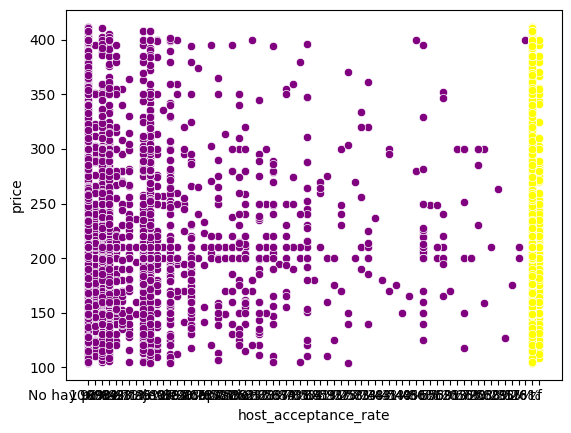

In [12]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [13]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [14]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No hay porcentaje de aceptacion", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [15]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.44585069]),
 'rank_': 1,
 'singular_': array([21.1588435]),
 'intercept_': np.float64(211.55793857216185)}

In [16]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([212.00378926, 211.98595524, 211.99933076, ..., 211.95920419,
       211.55793857, 211.55793857], shape=(5415,))

In [17]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,212.003789,1,https://www.airbnb.com/rooms/84581,2024-09-05,"Kentisbury Country House is a gorgeous, self c...",https://www.airbnb.com/users/show/461471,2011-03-24,within an hour,100%,1.00,...,4.99,4.98,4.98,4.90,1.00,1.0,0.0,0.0,1.27,1
1,211.985955,2,https://www.airbnb.com/rooms/88873,2024-09-05,A two storey 1880 terrace house.<br />Located ...,https://www.airbnb.com/users/show/485048,2011-04-05,within an hour,100%,0.96,...,4.77,4.93,4.87,4.87,1.00,1.0,0.0,0.0,3.81,1
2,211.999331,3,https://www.airbnb.com/rooms/137808,2024-09-05,"Bradman House: Polished boards, modern kitchen...",https://www.airbnb.com/users/show/673625,2011-06-07,within an hour,100%,0.99,...,4.73,4.97,4.96,4.92,2.00,2.0,0.0,0.0,2.69,1
3,212.003789,4,https://www.airbnb.com/rooms/252996,2024-09-05,"Welcome to Eagles Rise and the Cosy Cabin, wit...",https://www.airbnb.com/users/show/1090010,2011-08-31,within an hour,100%,1.00,...,4.94,4.91,4.95,4.83,2.00,2.0,0.0,0.0,0.54,1
4,212.003789,6,https://www.airbnb.com/rooms/270374,2024-09-05,NEW!!! A QUEEN BED IS NOW SITUATED DOWNSTAIRS ...,https://www.airbnb.com/users/show/1090010,2011-08-31,within an hour,100%,1.00,...,4.99,4.99,5.00,4.94,2.00,2.0,0.0,0.0,0.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,211.994872,6225,https://www.airbnb.com/rooms/1234371078098610539,2024-09-05,Cute cottage in historic Battery Point.<br />Q...,https://www.airbnb.com/users/show/151936855,2017-09-24,within an hour,100%,0.98,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1
5411,212.003789,6226,https://www.airbnb.com/rooms/1234536628221406790,2024-09-05,"Welcome to The Bambino, by the Casa Bicheno, a...",https://www.airbnb.com/users/show/96784548,2016-09-26,within an hour,100%,1.00,...,4.90,5.00,5.00,4.90,2.36,1.7,0.0,0.0,1.50,1
5412,211.959204,6227,https://www.airbnb.com/rooms/1235102258503641649,2024-09-05,"A beautiful home away from home, the property ...",https://www.airbnb.com/users/show/49758789,2015-11-24,within an hour,100%,0.90,...,4.90,5.00,5.00,4.90,3.00,3.0,0.0,0.0,1.50,1
5413,211.557939,6228,https://www.airbnb.com/rooms/1235296169504767618,2024-09-05,You'll have a great time at this comfortable p...,https://www.airbnb.com/users/show/9765814,2013-11-02,No hay tiempo de respuesta,No hay porcentaje de respuesta,0.00,...,4.90,5.00,5.00,4.90,1.00,1.0,0.0,0.0,1.50,1


In [18]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

4.091789622906461e-06

In [19]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0020228172490134796)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

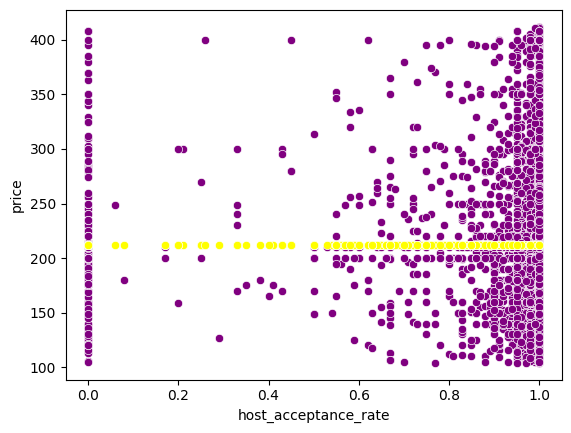

In [20]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [21]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_21696\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [22]:
df['room_type'] = 1

In [23]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

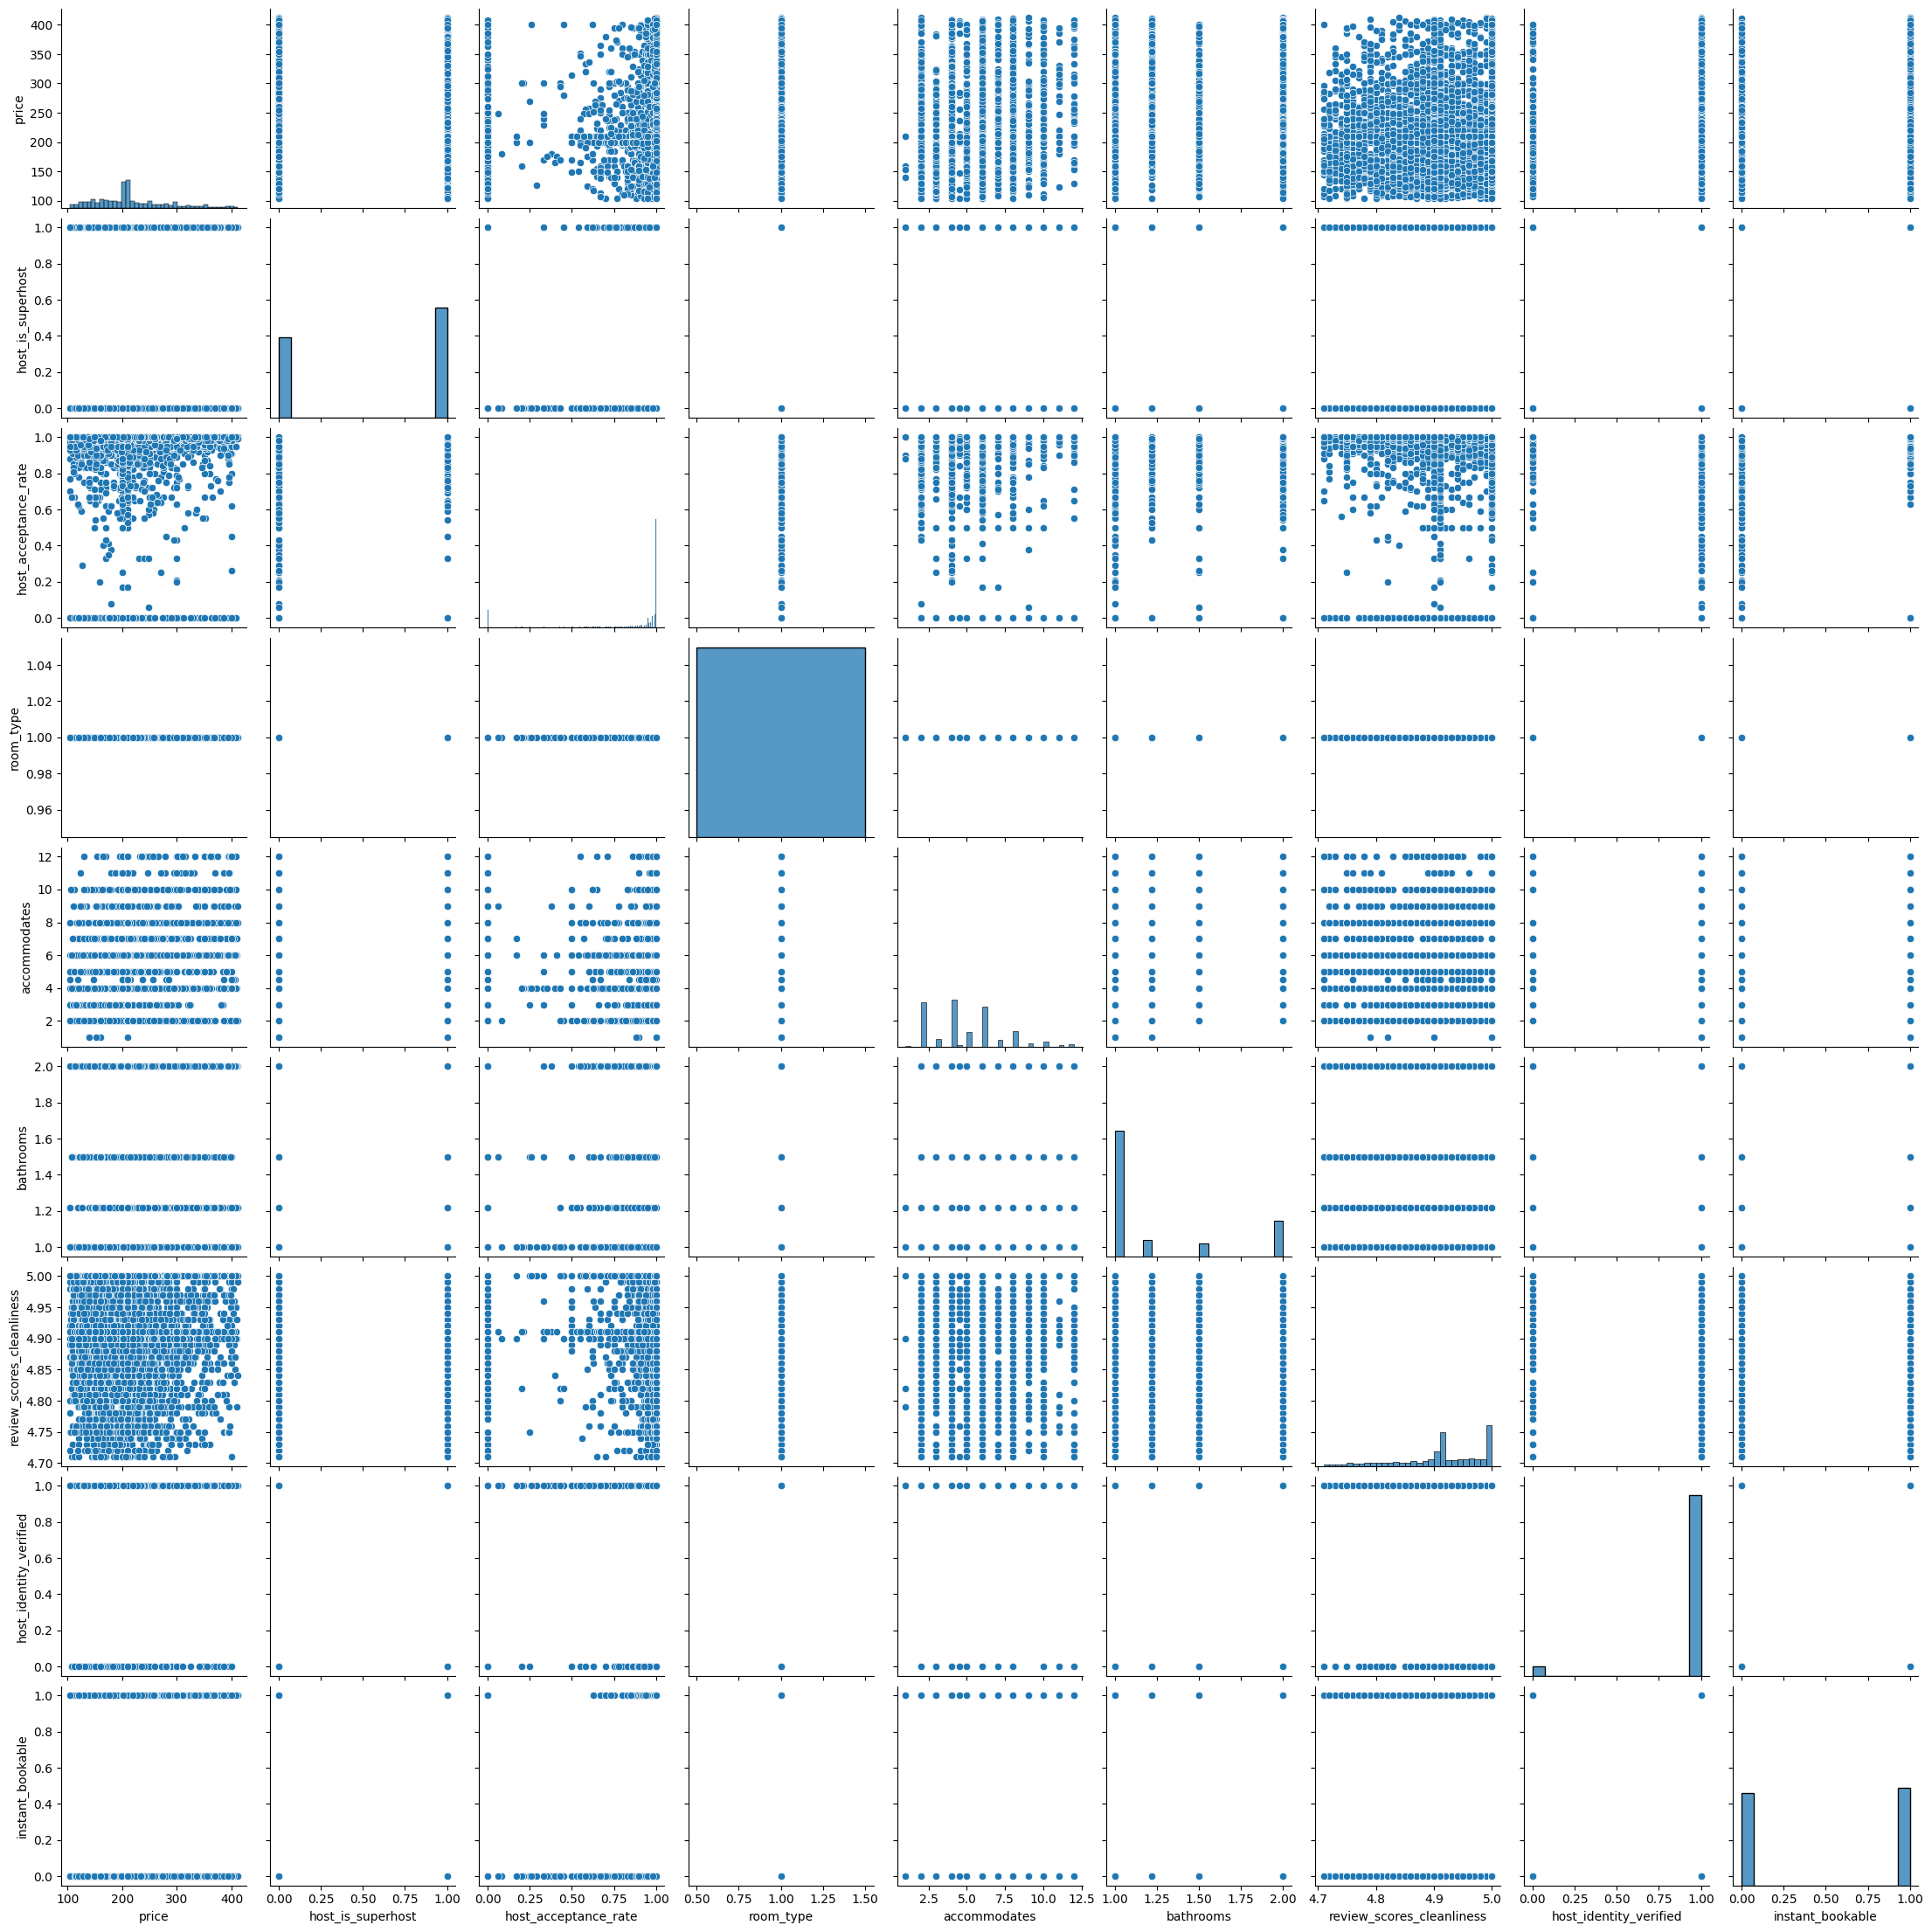

In [24]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [25]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,-0.045170,0.002023,NaN,0.262335,0.263742,0.032076,0.005519,0.113223
host_is_superhost,-0.045170,1.000000,0.403230,NaN,-0.072637,0.009382,0.058632,0.141777,0.051494
host_acceptance_rate,0.002023,0.403230,1.000000,NaN,0.023111,0.103337,-0.048283,0.198763,0.141748
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.262335,-0.072637,0.023111,NaN,1.000000,0.425632,-0.159673,0.014411,0.015694
bathrooms,0.263742,0.009382,0.103337,NaN,0.425632,1.000000,-0.045758,0.023548,0.048854
review_scores_cleanliness,0.032076,0.058632,-0.048283,NaN,-0.159673,-0.045758,1.000000,-0.053855,-0.064662
host_identity_verified,0.005519,0.141777,0.198763,NaN,0.014411,0.023548,-0.053855,1.000000,0.063093
instant_bookable,0.113223,0.051494,0.141748,NaN,0.015694,0.048854,-0.064662,0.063093,1.000000


In [26]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.045170,0.002023,NaN,0.262335,0.263742,0.032076,0.005519,0.113223
host_is_superhost,0.045170,1.000000,0.403230,NaN,0.072637,0.009382,0.058632,0.141777,0.051494
host_acceptance_rate,0.002023,0.403230,1.000000,NaN,0.023111,0.103337,0.048283,0.198763,0.141748
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.262335,0.072637,0.023111,NaN,1.000000,0.425632,0.159673,0.014411,0.015694
bathrooms,0.263742,0.009382,0.103337,NaN,0.425632,1.000000,0.045758,0.023548,0.048854
review_scores_cleanliness,0.032076,0.058632,0.048283,NaN,0.159673,0.045758,1.000000,0.053855,0.064662
host_identity_verified,0.005519,0.141777,0.198763,NaN,0.014411,0.023548,0.053855,1.000000,0.063093
instant_bookable,0.113223,0.051494,0.141748,NaN,0.015694,0.048854,0.064662,0.063093,1.000000


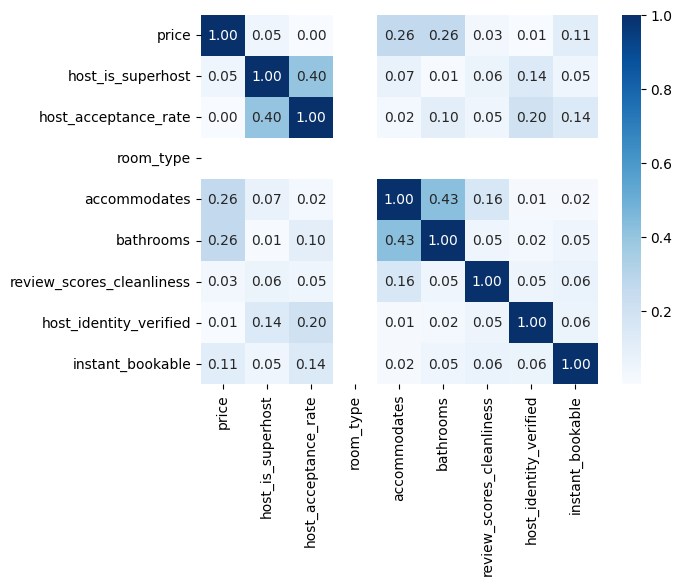

In [27]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

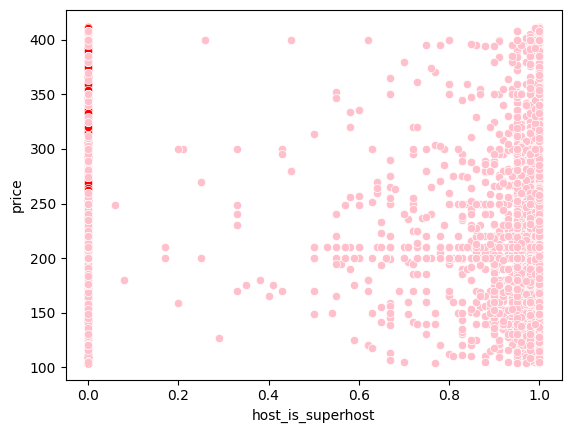

In [28]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [29]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [30]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [31]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-5.79851876]),
 'rank_': 1,
 'singular_': array([36.32962869]),
 'intercept_': np.float64(215.30939885914884)}

In [32]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0020403590889276346

In [33]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([209.5108801 , 209.5108801 , 215.30939886, ..., 209.5108801 ,
       215.30939886, 215.30939886], shape=(5415,))

In [34]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,209.510880,299.0,1,1.00,1,9.0,2.0,4.99,1,1
1,209.510880,125.0,1,0.96,1,4.0,1.0,4.77,1,0
2,215.309399,239.0,0,0.99,1,9.0,2.0,4.73,1,1
3,209.510880,110.0,1,1.00,1,2.0,1.0,4.94,1,0
4,209.510880,119.0,1,1.00,1,3.0,1.0,4.99,1,1
...,...,...,...,...,...,...,...,...,...,...
5410,215.309399,160.0,0,0.98,1,2.0,1.0,4.90,1,0
5411,209.510880,258.0,1,1.00,1,2.0,1.0,4.90,1,1
5412,209.510880,394.0,1,0.90,1,6.0,2.0,4.90,1,0
5413,215.309399,130.0,0,0.00,1,2.0,1.0,4.90,1,1


In [35]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0020403590889276346

In [36]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.04517033416887277)

<Axes: xlabel='host_is_superhost', ylabel='price'>

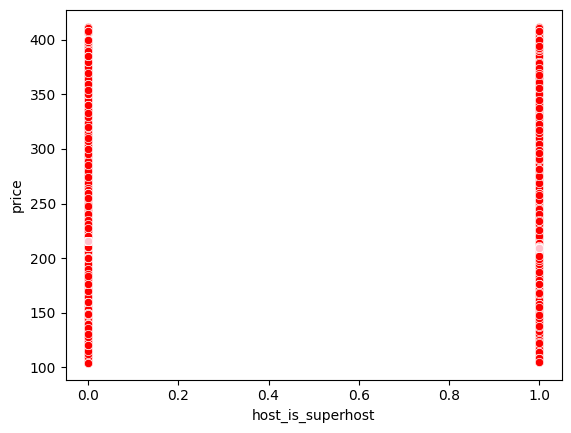

In [37]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

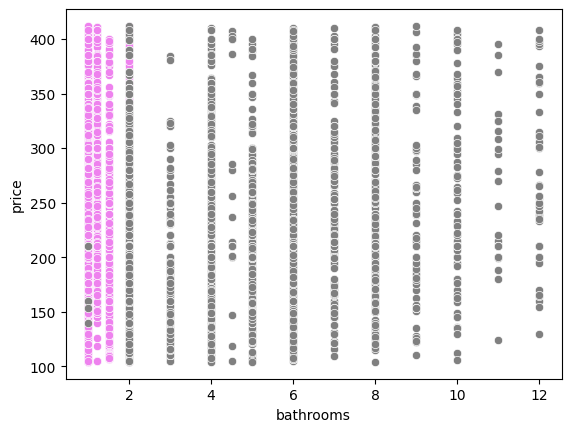

In [38]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [39]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [40]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [41]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([43.21009034]),
 'rank_': 1,
 'singular_': array([28.4654579]),
 'intercept_': np.float64(158.4678120209128)}

In [42]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.06955962839351493

In [43]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([244.8879927 , 201.67790236, 244.8879927 , ..., 244.8879927 ,
       201.67790236, 201.67790236], shape=(5415,))

In [44]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

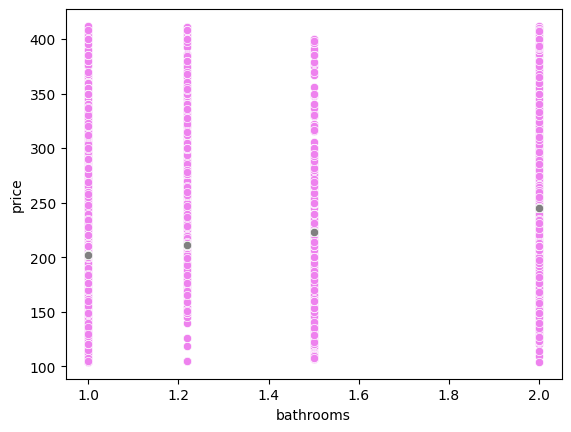

In [45]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [46]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.06955962839351493

In [47]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.26374159397697383)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

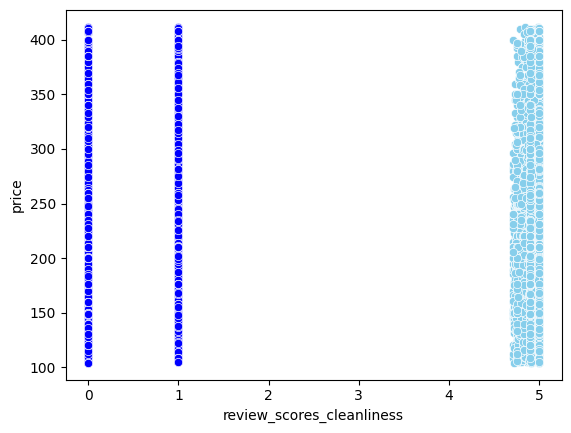

In [48]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [49]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [50]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [51]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([27.48346144]),
 'rank_': 1,
 'singular_': array([5.44290383]),
 'intercept_': np.float64(76.98272710226493)}

In [52]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.0010288563383907823

In [53]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([214.12519967, 208.07883815, 206.97949969, ..., 211.65168814,
       211.65168814, 211.65168814], shape=(5415,))

In [54]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

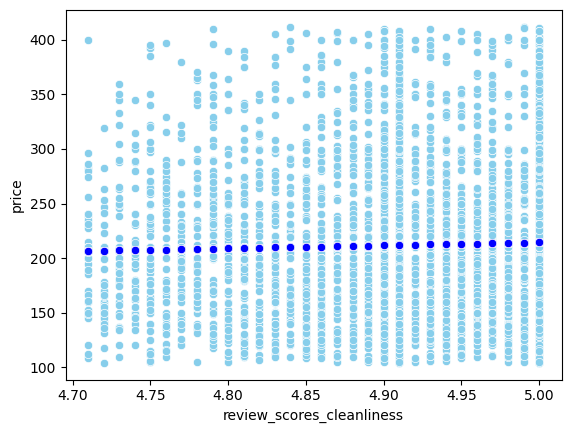

In [55]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [56]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.0010288563383907823

In [57]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0320757905341518)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

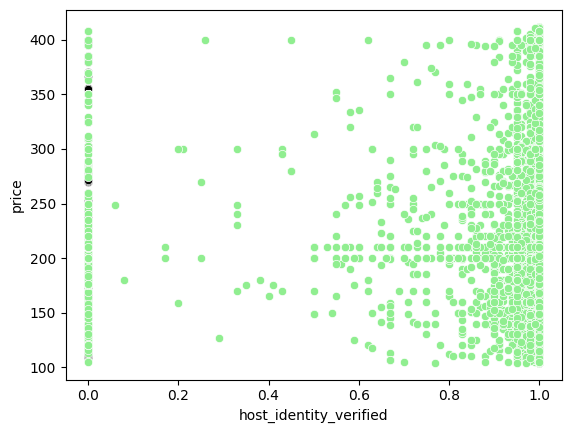

In [58]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [59]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [60]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [61]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.61263341]),
 'rank_': 1,
 'singular_': array([15.96045436]),
 'intercept_': np.float64(210.4184701492538)}

In [62]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

3.0458770002961266e-05

In [63]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([212.03110356, 212.03110356, 212.03110356, ..., 212.03110356,
       212.03110356, 210.41847015], shape=(5415,))

In [64]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,212.031104,214.125200,244.887993,209.510880,299.0,1,1.00,1,9.0,2.0,4.99,1,1
1,212.031104,208.078838,201.677902,209.510880,125.0,1,0.96,1,4.0,1.0,4.77,1,0
2,212.031104,206.979500,244.887993,215.309399,239.0,0,0.99,1,9.0,2.0,4.73,1,1
3,212.031104,212.751027,201.677902,209.510880,110.0,1,1.00,1,2.0,1.0,4.94,1,0
4,212.031104,214.125200,201.677902,209.510880,119.0,1,1.00,1,3.0,1.0,4.99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,212.031104,211.651688,201.677902,215.309399,160.0,0,0.98,1,2.0,1.0,4.90,1,0
5411,212.031104,211.651688,201.677902,209.510880,258.0,1,1.00,1,2.0,1.0,4.90,1,1
5412,212.031104,211.651688,244.887993,209.510880,394.0,1,0.90,1,6.0,2.0,4.90,1,0
5413,212.031104,211.651688,201.677902,215.309399,130.0,0,0.00,1,2.0,1.0,4.90,1,1


<Axes: xlabel='host_identity_verified', ylabel='price'>

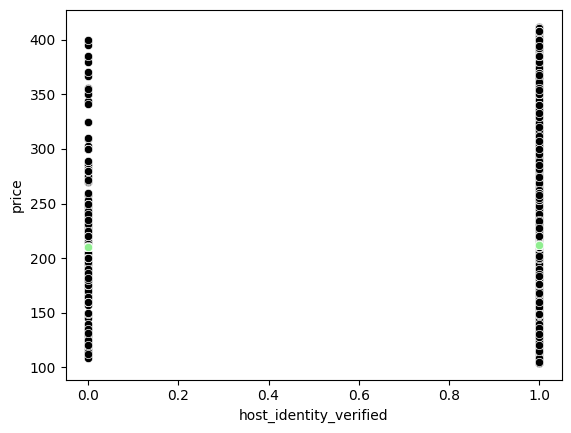

In [65]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [66]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

3.0458770002961266e-05

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0055189464577001714)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

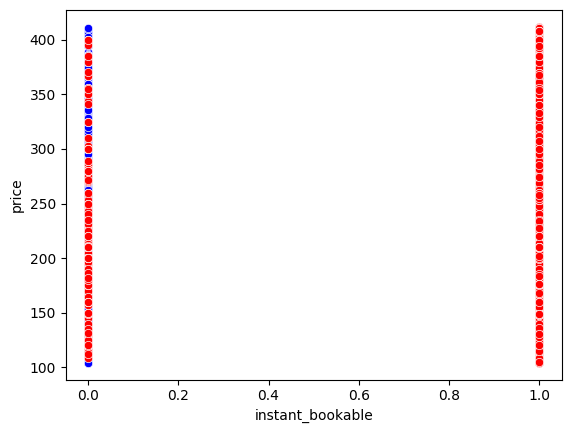

In [68]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [69]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [70]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [71]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([14.35773337]),
 'rank_': 1,
 'singular_': array([36.7766687]),
 'intercept_': np.float64(204.55632901751716)}

In [72]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.012819382295046533

In [73]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([218.91406239, 204.55632902, 218.91406239, ..., 204.55632902,
       218.91406239, 218.91406239], shape=(5415,))

In [74]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,218.914062,212.031104,214.125200,244.887993,209.510880,299.0,1,1.00,1,9.0,2.0,4.99,1,1
1,204.556329,212.031104,208.078838,201.677902,209.510880,125.0,1,0.96,1,4.0,1.0,4.77,1,0
2,218.914062,212.031104,206.979500,244.887993,215.309399,239.0,0,0.99,1,9.0,2.0,4.73,1,1
3,204.556329,212.031104,212.751027,201.677902,209.510880,110.0,1,1.00,1,2.0,1.0,4.94,1,0
4,218.914062,212.031104,214.125200,201.677902,209.510880,119.0,1,1.00,1,3.0,1.0,4.99,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,204.556329,212.031104,211.651688,201.677902,215.309399,160.0,0,0.98,1,2.0,1.0,4.90,1,0
5411,218.914062,212.031104,211.651688,201.677902,209.510880,258.0,1,1.00,1,2.0,1.0,4.90,1,1
5412,204.556329,212.031104,211.651688,244.887993,209.510880,394.0,1,0.90,1,6.0,2.0,4.90,1,0
5413,218.914062,212.031104,211.651688,201.677902,215.309399,130.0,0,0.00,1,2.0,1.0,4.90,1,1


<Axes: xlabel='instant_bookable', ylabel='price'>

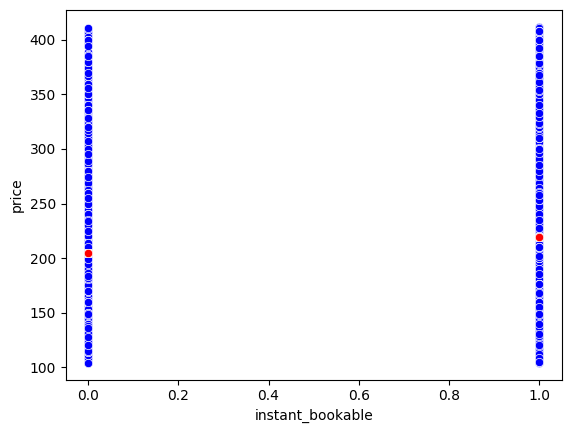

In [75]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [76]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.012819382295046533

In [77]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.11322271103911323)